# PARTIE 1

## Import

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import networkx as nx



In [95]:
#import the data with utils.py

data = load_reviews_csv("data_cleaned/reviews_cleaned.csv")
metadata = load_metadata_json("data_cleaned/metadata_cleaned.json")


c:\Users\jacqu\epita\ING3\eda\EDA\src\utils.py:9: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  'verified': np.bool8,


In [96]:
data.head()

,overall,verified,reviewerID,asin,reviewText,summary,unixReviewTime,vote,title
0,5.0,True,A2HVNCQUR2J4NL,0001526146,this is music from my younger years that i as ...,Great. music,2017-01-20,NaN,Early Works - Dallas Holm
1,5.0,True,A50DSLM71EAVO,0001526146,i love dallas holms music and voice thank you ...,Five Stars,2016-10-03,NaN,Early Works - Dallas Holm
2,5.0,True,A33NJBWHVS6HKX,0001526146,a great collection of dallas s early music eas...,An inspiring collection of songs,2016-08-29,NaN,Early Works - Dallas Holm
3,5.0,True,A3BQ84G90BRVSG,0001526146,bought this for my daughter she has enjoyed it,Early works - Dallas Holm,2016-06-25,NaN,Early Works - Dallas Holm
4,5.0,True,A150DKJ7BD9A4L,0001526146,many awesome tracks though rise again is the o...,These songs have haunted me for 30 years,2016-05-09,NaN,Early Works - Dallas Holm


In [97]:
metadata.head()

,description,title,also_buy,brand,rank,also_view,price,asin,details
0,1. Losing Game 2. I Can't Wait 3. Didn't He Sh...,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",Dallas Holm,399269.0,"[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...",NaN,0001526146,<NA>
1,.,Sing &amp; Play Swamp Stomp Music,None,Totally Catholic Summer Program - Crocodile Dock,774772.0,None,6.980000,0159024684,<NA>
2,The Music Connection by Silver Burdett Ginn is...,"The Music Connection Grade 3, CD 7",None,Silver Burdett Ginn,694369.0,"[0382262948, 0382262875, 0382262891, 038226290...",18.790001,0382262921,<NA>
3,Spanish Before You Know It - Gold Edition. Lea...,Spanish Before You Know It - Gold Edition,None,Transparent Language,1153345.0,None,9600.610352,0545069882,<NA>
4,Just the CD. The Book has long since vanished....,Puff the Magic Dragon,None,<NA>,242922.0,"[B00YZ82TPW, B0009YA39U, 1402747829, B00U1CES3...",6.140000,0545109620,<NA>


#### Hypothèse 1: on ne prend en compte que les données provenant d'un utilisateur vérifié

In [98]:
data_verified = data[data["verified"] == True]
data_verified.head()

,overall,verified,reviewerID,asin,reviewText,summary,unixReviewTime,vote,title
0,5.0,True,A2HVNCQUR2J4NL,0001526146,this is music from my younger years that i as ...,Great. music,2017-01-20,NaN,Early Works - Dallas Holm
1,5.0,True,A50DSLM71EAVO,0001526146,i love dallas holms music and voice thank you ...,Five Stars,2016-10-03,NaN,Early Works - Dallas Holm
2,5.0,True,A33NJBWHVS6HKX,0001526146,a great collection of dallas s early music eas...,An inspiring collection of songs,2016-08-29,NaN,Early Works - Dallas Holm
3,5.0,True,A3BQ84G90BRVSG,0001526146,bought this for my daughter she has enjoyed it,Early works - Dallas Holm,2016-06-25,NaN,Early Works - Dallas Holm
4,5.0,True,A150DKJ7BD9A4L,0001526146,many awesome tracks though rise again is the o...,These songs have haunted me for 30 years,2016-05-09,NaN,Early Works - Dallas Holm


In [99]:
# remove from the metadata the asin that are not verified_review in the data
metadata3 = metadata[metadata["asin"].isin(data_verified["asin"].tolist())]

#remove from the metadata the rows where also_buy is none
metadata_graph = metadata3[metadata3["also_buy"].notnull()]


In [100]:
metadata3.head()

,description,title,also_buy,brand,rank,also_view,price,asin,details
0,1. Losing Game 2. I Can't Wait 3. Didn't He Sh...,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",Dallas Holm,399269.0,"[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...",NaN,0001526146,<NA>
1,.,Sing &amp; Play Swamp Stomp Music,None,Totally Catholic Summer Program - Crocodile Dock,774772.0,None,6.980000,0159024684,<NA>
2,The Music Connection by Silver Burdett Ginn is...,"The Music Connection Grade 3, CD 7",None,Silver Burdett Ginn,694369.0,"[0382262948, 0382262875, 0382262891, 038226290...",18.790001,0382262921,<NA>
3,Spanish Before You Know It - Gold Edition. Lea...,Spanish Before You Know It - Gold Edition,None,Transparent Language,1153345.0,None,9600.610352,0545069882,<NA>
4,Just the CD. The Book has long since vanished....,Puff the Magic Dragon,None,<NA>,242922.0,"[B00YZ82TPW, B0009YA39U, 1402747829, B00U1CES3...",6.140000,0545109620,<NA>


In [101]:
also_buy_clean = []
set_articles = set(metadata_graph["asin"])
for i in metadata_graph["also_buy"]:
    for j in i:
        if j in set_articles:
            also_buy_clean.append(j)
also_buy_clean = set(also_buy_clean)
len(also_buy_clean)

1066

In [102]:
asin_clean = []

for i in metadata_graph["asin"]:
    if i in also_buy_clean:
        asin_clean.append(i)
asin_clean = set(asin_clean)
len(asin_clean)

1066

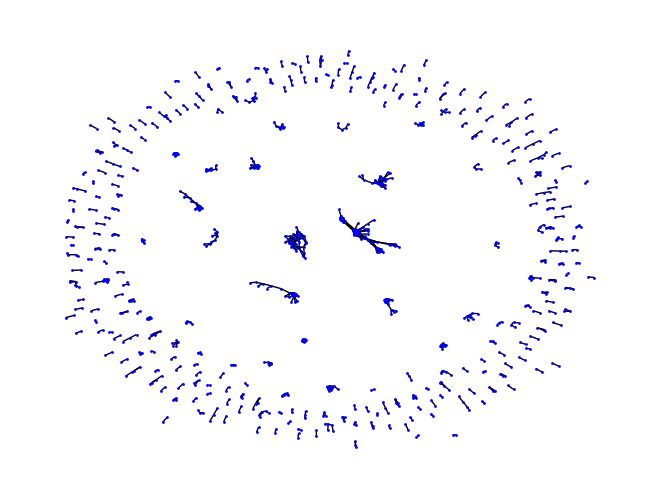

In [103]:
# graph of the article that are buy together

G = nx.Graph()
G.add_nodes_from(asin_clean)
for i in asin_clean:
    for j in metadata[metadata["asin"] == i]["also_buy"]:
        if j is not None:
            for k in j:
                if k in also_buy_clean and k != i:
                    G.add_edge(i, k)

# remove the node that have no edge
nodes_to_remove = []
for i in G.nodes():
    if G.degree(i) == 0:
        nodes_to_remove.append(i)
G.remove_nodes_from(nodes_to_remove)

# draw the graph
nx.draw(G, node_size=1, node_color="blue", with_labels=False)
plt.show()

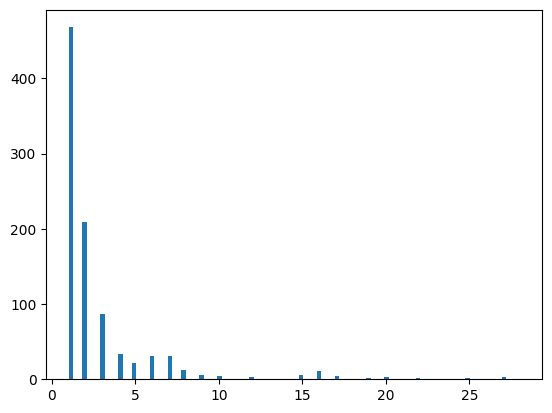

In [104]:
# do an histogram of the number of edges
edges = []
for i in G.nodes():
    edges.append(len(G.edges(i)))
plt.hist(edges, bins=100)
plt.show()

### 1. Quels sont les motifs fréquents?

#### Algorithmes Apriori et FP-Growth

In [105]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori


# create the list of list of the asin that are buy together
list_of_list = []
for i in metadata3["asin"]:
    if metadata3[metadata3["asin"] == i]["also_buy"].tolist()[0] is not None:
        i_also_buy = list(set([i] + metadata3[metadata3["asin"] == i]["also_buy"].tolist()[0])) 
        if i_also_buy not in list_of_list:
            list_of_list.append(i_also_buy)

# create the transaction encoder
te = TransactionEncoder()
te_ary = te.fit(list_of_list).transform(list_of_list)

# create the dataframe
df_encode = pd.DataFrame(te_ary, columns=te.columns_)
df_encode.head()

,0001377647,0001526146,0001529145,0005164885,0006920055,0006935257,0007145160,000716324X,0007211023,0007212496,...,B07LFQDVLN,B07LGLKML7,B07LGRM2QC,B07LGS2DZK,B07LGS5TVR,B07LGS7SBK,B07M9XSGX8,B07MF1MX49,B07MGRGL6W,B07MPNSWH1
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
frequent_itemsets_apriori = apriori(df_encode, min_support=0.0075, use_colnames=True)
frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by="support", ascending=False)
frequent_itemsets_apriori

,support,itemsets
0,0.011666,(B001LQSFKY)
4,0.011226,(B07BZBBVLF)
8,0.011006,(B07HFYZY7D)
1,0.009025,(B016IQPHDY)
2,0.008805,(B01LTHN0DG)
3,0.008365,(B072N8M6DN)
6,0.008365,(B07F99WH5Y)
9,0.008144,(B07HSM242F)
12,0.007924,"(B07BZBBVLF, B07F99WH5Y)"
5,0.007704,(B07DV95WN6)


In [107]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fpgrowth = fpgrowth(df_encode, min_support=0.0075, use_colnames=True)
frequent_itemsets_fpgrowth = frequent_itemsets_fpgrowth.sort_values(by="support", ascending=False)
frequent_itemsets_fpgrowth

,support,itemsets
5,0.011666,(B001LQSFKY)
6,0.011226,(B07BZBBVLF)
3,0.011006,(B07HFYZY7D)
8,0.009025,(B016IQPHDY)
4,0.008805,(B01LTHN0DG)
7,0.008365,(B07F99WH5Y)
9,0.008365,(B072N8M6DN)
0,0.008144,(B07HSM242F)
10,0.007924,"(B07BZBBVLF, B07F99WH5Y)"
1,0.007704,(B07FJCHBHB)


### 2. Quel est l'apport des motifs fermés?

In [108]:
from mlxtend.frequent_patterns import fpmax
frequent_itemsets_fpmax = fpmax(df_encode, min_support=0.0075, use_colnames=True)
frequent_itemsets_fpmax = frequent_itemsets_fpmax.sort_values(by="support", ascending=False)
frequent_itemsets_fpmax

,support,itemsets
8,0.011666,(B001LQSFKY)
7,0.011006,(B07HFYZY7D)
5,0.008805,(B01LTHN0DG)
2,0.008144,(B07HSM242F)
4,0.007924,"(B07BZBBVLF, B07F99WH5Y)"
0,0.007704,(B07DV95WN6)
1,0.007704,(B07FJCHBHB)
3,0.007704,"(B07BZBBVLF, B072N8M6DN)"
6,0.007704,"(B07BZBBVLF, B016IQPHDY)"


### 3. Quels sont les règles d'association les plus confiantes?

In [109]:
# association rules algorithm with apriori
from mlxtend.frequent_patterns import association_rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
rules_apriori = rules_apriori.sort_values(by="confidence", ascending=False)
rules_apriori


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(B07F99WH5Y),(B07BZBBVLF),0.008365,0.011226,0.007924,0.947368,84.390093,0.007830,18.786705,0.996485
5,(B072N8M6DN),(B07BZBBVLF),0.008365,0.011226,0.007704,0.921053,82.045924,0.007610,12.524470,0.996144
3,(B016IQPHDY),(B07BZBBVLF),0.009025,0.011226,0.007704,0.853659,76.042563,0.007603,6.756622,0.995837
0,(B07BZBBVLF),(B07F99WH5Y),0.011226,0.008365,0.007924,0.705882,84.390093,0.007830,3.371561,0.999369
2,(B07BZBBVLF),(B016IQPHDY),0.011226,0.009025,0.007704,0.686275,76.042563,0.007603,3.158733,0.998054
4,(B07BZBBVLF),(B072N8M6DN),0.011226,0.008365,0.007704,0.686275,82.045924,0.007610,3.160838,0.999027


In [110]:
#association rules algorithm with fpgrowth
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.5)
rules_fpgrowth = rules_fpgrowth.sort_values(by="confidence", ascending=False)
rules_fpgrowth

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(B07F99WH5Y),(B07BZBBVLF),0.008365,0.011226,0.007924,0.947368,84.390093,0.007830,18.786705,0.996485
5,(B072N8M6DN),(B07BZBBVLF),0.008365,0.011226,0.007704,0.921053,82.045924,0.007610,12.524470,0.996144
3,(B016IQPHDY),(B07BZBBVLF),0.009025,0.011226,0.007704,0.853659,76.042563,0.007603,6.756622,0.995837
0,(B07BZBBVLF),(B07F99WH5Y),0.011226,0.008365,0.007924,0.705882,84.390093,0.007830,3.371561,0.999369
2,(B07BZBBVLF),(B016IQPHDY),0.011226,0.009025,0.007704,0.686275,76.042563,0.007603,3.158733,0.998054
4,(B07BZBBVLF),(B072N8M6DN),0.011226,0.008365,0.007704,0.686275,82.045924,0.007610,3.160838,0.999027


In [111]:
#closed association rules algorithm with fpmax
rules_fpmax = association_rules(frequent_itemsets_fpmax, metric="confidence", min_threshold=0.001, support_only=True)
rules_fpmax = rules_fpmax.sort_values(by="confidence", ascending=False)
rules_fpmax

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B07BZBBVLF),(B07F99WH5Y),NaN,NaN,0.007924,NaN,NaN,NaN,NaN,NaN
1,(B07F99WH5Y),(B07BZBBVLF),NaN,NaN,0.007924,NaN,NaN,NaN,NaN,NaN
2,(B07BZBBVLF),(B072N8M6DN),NaN,NaN,0.007704,NaN,NaN,NaN,NaN,NaN
3,(B072N8M6DN),(B07BZBBVLF),NaN,NaN,0.007704,NaN,NaN,NaN,NaN,NaN
4,(B07BZBBVLF),(B016IQPHDY),NaN,NaN,0.007704,NaN,NaN,NaN,NaN,NaN
5,(B016IQPHDY),(B07BZBBVLF),NaN,NaN,0.007704,NaN,NaN,NaN,NaN,NaN


### 4. Est-il possible de trouver des comportantes propres à une sous-population?

In [112]:
metadata_beatles = metadata3[metadata3["brand"] == "The Beatles"]
metadata_beatles = metadata_beatles[metadata_beatles["also_buy"].notnull()]

In [113]:
metadata3[metadata3["brand"] == "The Beatles"]

,description,title,also_buy,brand,rank,also_view,price,asin,details
12169,This is a The Beatles Story LP 2 record Gatefo...,The Beatles Story Original Double Lp Mono Capi...,"[B000TBFX4I, B076W8Y6BB, B01IO7OHUE, B00JK5HLO...",The Beatles,210675.0,"[B00GJ7RP4C, B00GJ7ROV6, B00GJ7ROYS, B00GJ7ROZ...",26.990000,B000LYKXAW,"{'Original Release Date:': '1964', 'Number of ..."
13287,Very rare and hard to find lp cd. The Rarities...,"<span class=""a-size-medium a-color-secondary a...",None,The Beatles,852090.0,"[B00008ET4V, B006IUG2IK, B002BSHWUU, B01K4OMRM...",NaN,B000P56BSK,{'ASIN:': 'B000P56BSK'}
13656,a limited edition recorded in luxembourg one o...,"<span class=""a-size-medium a-color-secondary a...",None,The Beatles,1284208.0,None,14.990000,B000QDVP1O,{'ASIN:': 'B000QDVP1O'}
14570,"this is a record album, not a cd",The Beatles/1962-1966 (Record Album;Double Set),"[B003YNFYD8, B0041KVZ1I]",The Beatles,2075796.0,"[B003YNFYCO, B0041KVZ1I, B015P76FM4, B076W8Y6B...",NaN,B000TR70RU,"{'Label:': 'Apple', 'ASIN:': 'B000TR70RU'}"
14937,Gatefold Edition,"<span class=""a-size-medium a-color-secondary a...",None,The Beatles,591607.0,"[B07HFZ95Z9, B002BSHWUU, B0041KVZ1I, B076W8Y6B...",1244.949951,B000V98Y76,"{'Number of Discs:': '14', 'Note on Boxed Sets..."
14996,45 RPM - COLOR PICTURE SLEEVE FRONT &amp; BACK...,"The Beatles ""The Ballad of John and Yoko"" / ""O...",[B00OGPK4S8],The Beatles,149791.0,"[B002BSHWUU, B07CVM5RT9, B076W8Y6BB]",72.000000,B000VEFPD2,"{'Original Release Date:': '1969', 'Number of ..."
15038,Authorized Lost Decca Sessions cd's are only a...,"<span class=""a-size-medium a-color-secondary a...",None,The Beatles,190063.0,"[B07HFZ95Z9, B01K4OMRMA, B00AIUSF2C, B000050I0U]",NaN,B000VJ3BYC,"{'Label:': 'Recall Records', 'ASIN:': 'B000VJ3..."
15065,Artist: The Beatles Year: 1964 Label: Swan Nu...,"""SHE LOVES YOU/I'LL GET YOU""",None,The Beatles,2155035.0,None,60.000000,B000VNGHLC,"{'Original Release Date:': '1964', 'Number of ..."
15087,Get Back / Don't Let Me Down SUBSIDIARY VINYL ...,Get Back/ Don't Let Me Down (45rpm),None,The Beatles,478085.0,"[B00U2ROCZU, B003YNFYCO, B003YNFYD8]",NaN,B000VOYKD8,"{'Original Release Date:': '1969', 'Number of ..."
15744,"YD-053 DURING THE GET BACK SESSIONS,GEORGE HAR...",All Things Must Pass Acoustic,None,The Beatles,1374932.0,None,NaN,B000YH8YHU,{'ASIN:': 'B000YH8YHU'}


In [114]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# create the list of list of the asin that are buy together
list_of_list = []

for i in metadata3["asin"]:
    condition = (metadata3["asin"] == i) & (metadata3["brand"] == "The Beatles")
    also_buy_list = metadata3.loc[condition, "also_buy"].tolist()
    if also_buy_list and also_buy_list[0] is not None:
        i_also_buy = list(set([i] + also_buy_list[0]))
        if i_also_buy not in list_of_list:
            list_of_list.append(i_also_buy)

# create the transaction encoder
te = TransactionEncoder()
te_ary = te.fit(list_of_list).transform(list_of_list)

# create the dataframe
df_encode_beatles = pd.DataFrame(te_ary, columns=te.columns_)
df_encode_beatles.head()


,0062475487,0760346593,0811826848,0983295743,1548023930,1592402690,1617131202,1635712955,1851498680,1851498990,...,B07FJCHBHB,B07FPYQT35,B07G234F8N,B07GRJM3KP,B07H16RQQ9,B07H5VWH4J,B07HFYZY7D,B07HFZ95Z9,B07HFZKLBL,B07J3691L6
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
beatles_apriori = apriori(df_encode_beatles, min_support=0.3, use_colnames=True)
beatles_apriori = beatles_apriori.sort_values(by="support", ascending=False)
beatles_apriori

,support,itemsets
2,0.421053,(B076W8Y6BB)
1,0.368421,(B0041KVZ1I)
0,0.315789,(B0041KVZ0Y)
3,0.315789,(B07HFZKLBL)
4,0.315789,"(B0041KVZ0Y, B076W8Y6BB)"
5,0.315789,"(B07HFZKLBL, B0041KVZ0Y)"
6,0.315789,"(B07HFZKLBL, B076W8Y6BB)"
7,0.315789,"(B07HFZKLBL, B0041KVZ0Y, B076W8Y6BB)"


In [119]:
beatles_fpgrowth = fpgrowth(df_encode_beatles, min_support=0.3, use_colnames=True)
beatles_fpgrowth = beatles_fpgrowth.sort_values(by="support", ascending=False)
beatles_fpgrowth

,support,itemsets
0,0.421053,(B076W8Y6BB)
1,0.368421,(B0041KVZ1I)
2,0.315789,(B07HFZKLBL)
3,0.315789,(B0041KVZ0Y)
4,0.315789,"(B07HFZKLBL, B076W8Y6BB)"
5,0.315789,"(B07HFZKLBL, B0041KVZ0Y)"
6,0.315789,"(B0041KVZ0Y, B076W8Y6BB)"
7,0.315789,"(B07HFZKLBL, B0041KVZ0Y, B076W8Y6BB)"


In [116]:
from mlxtend.frequent_patterns import association_rules
rules_apriori_beatles = association_rules(beatles_apriori, metric="confidence", min_threshold=0.5)
rules_apriori_beatles = rules_apriori_beatles.sort_values(by="confidence", ascending=False)
rules_apriori_beatles

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B0041KVZ0Y),(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
2,(B07HFZKLBL),(B0041KVZ0Y),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
3,(B0041KVZ0Y),(B07HFZKLBL),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
4,(B07HFZKLBL),(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
6,"(B07HFZKLBL, B0041KVZ0Y)",(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
7,"(B07HFZKLBL, B076W8Y6BB)",(B0041KVZ0Y),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
8,"(B0041KVZ0Y, B076W8Y6BB)",(B07HFZKLBL),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
9,(B07HFZKLBL),"(B0041KVZ0Y, B076W8Y6BB)",0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
10,(B0041KVZ0Y),"(B07HFZKLBL, B076W8Y6BB)",0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
1,(B076W8Y6BB),(B0041KVZ0Y),0.421053,0.315789,0.315789,0.75,2.375000,0.182825,2.736842,1.000000


In [120]:
rules_fpgrowth_beatles = association_rules(beatles_fpgrowth, metric="confidence", min_threshold=0.5)
rules_fpgrowth_beatles = rules_fpgrowth_beatles.sort_values(by="confidence", ascending=False)
rules_fpgrowth_beatles

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B07HFZKLBL),(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
2,(B07HFZKLBL),(B0041KVZ0Y),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
3,(B0041KVZ0Y),(B07HFZKLBL),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
4,(B0041KVZ0Y),(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
6,"(B07HFZKLBL, B0041KVZ0Y)",(B076W8Y6BB),0.315789,0.421053,0.315789,1.00,2.375000,0.182825,inf,0.846154
7,"(B07HFZKLBL, B076W8Y6BB)",(B0041KVZ0Y),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
8,"(B0041KVZ0Y, B076W8Y6BB)",(B07HFZKLBL),0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
9,(B07HFZKLBL),"(B0041KVZ0Y, B076W8Y6BB)",0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
10,(B0041KVZ0Y),"(B07HFZKLBL, B076W8Y6BB)",0.315789,0.315789,0.315789,1.00,3.166667,0.216066,inf,1.000000
1,(B076W8Y6BB),(B07HFZKLBL),0.421053,0.315789,0.315789,0.75,2.375000,0.182825,2.736842,1.000000
